In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cities = ["Tehran", "Mashahad", "Isfihan", "Tabriz", "Shiraz", "Ahwaz"]
data = []

for city in cities:
    for day in range(1, 31):
        item = [day , city, np.random.randint(15 , 41) , np.random.randint(20 , 81),  np.random.randint(0 , 51)]
        data.append(item)


df = pd.DataFrame(data , columns=["Day", "City", "Temperature", "Humidity", "Rainfall"])
df.head()



,Day,City,Temperature,Humidity,Rainfall
0,1,Tehran,21,41,43
1,2,Tehran,21,29,12
2,3,Tehran,24,36,27
3,4,Tehran,18,67,40
4,5,Tehran,33,27,30


In [2]:
avg_gcolumns = df.groupby("City")[["Temperature", "Humidity" , "Rainfall"]].mean()

print(avg_gcolumns)

maxtemp = avg_gcolumns["Temperature"].idxmax() , avg_gcolumns["Temperature"].max()
maxtemp

mintemp = avg_gcolumns["Temperature"].idxmin() , avg_gcolumns["Temperature"].min()
mintemp

filtered_df = df[df['Rainfall'] > 10]
overrain = filtered_df.groupby("City")["Rainfall"].count()
overrain
df



          Temperature   Humidity   Rainfall
City                                       
Ahwaz       27.633333  56.600000  24.033333
Isfihan     27.566667  49.033333  29.066667
Mashahad    28.500000  50.633333  25.100000
Shiraz      25.733333  51.066667  26.700000
Tabriz      27.266667  55.766667  20.433333
Tehran      26.833333  48.000000  22.966667


,Day,City,Temperature,Humidity,Rainfall
0,1,Tehran,21,41,43
1,2,Tehran,21,29,12
2,3,Tehran,24,36,27
3,4,Tehran,18,67,40
4,5,Tehran,33,27,30
...,...,...,...,...,...
175,26,Ahwaz,28,59,42
176,27,Ahwaz,22,67,32
177,28,Ahwaz,27,67,33
178,29,Ahwaz,25,48,3


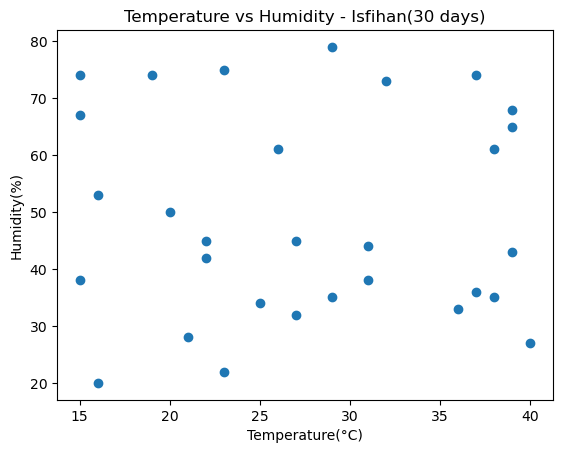

In [3]:
df_isfihan=df[df['City']== 'Isfihan']
plt.scatter(df_isfihan["Temperature"], df_isfihan["Humidity"])
plt.title( 'Temperature vs Humidity - Isfihan(30 days)')
plt.xlabel("Temperature(°C)")
plt.ylabel('Humidity(%)')
plt.show() 


با در نظر گرفتن اینکه دیتاها رندوم هستن و دیتای واقعی نیستن میتوان گفت که مقدار دما هیچ ارتباطی با مقدار رطوبت ندارد و هر دو جداگانه و شانسی انتخاب شدن. با توجه به نمودار مقابل هیچ رابطه خطی دیده نمیشه با افزایش دما افزایش یا کاهش رطوبت دیده نمی شه پس انتظار نداریم رابطه‌ی خطی  بین دما و رطوبت دیده شه
به این معناست که نمیتوان رابطه درستی بین داده ها یافت کرد و یعنی دقت داده ها کافی نیست و داده پرت زیاد داریم هیچ نتیجه‌گیری علمی یا واقعی درباره‌ی آب‌وهوا نمیتوانیم بکنیم چون نتیجه‌اشتباه خواهد بود.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

diabetes = pd.read_csv("diabetes.csv")
filter_columns = diabetes.select_dtypes(include="number").columns


for column in filter_columns:
    meancolumn =diabetes[column].mean().round(2)
    diabetes[column].fillna(value=meancolumn, inplace=True)

df.info()
#diabetes_clean.isna().sum()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          180 non-null    int64 
 1   City         180 non-null    object
 2   Temperature  180 non-null    int64 
 3   Humidity     180 non-null    int64 
 4   Rainfall     180 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.2+ KB


C:\Users\Mlika\AppData\Local\Temp\ipykernel_6284\3253485226.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes[column].fillna(value=meancolumn, inplace=True)


,Day,City,Temperature,Humidity,Rainfall
0,1,Tehran,21,41,43
1,2,Tehran,21,29,12
2,3,Tehran,24,36,27
3,4,Tehran,18,67,40
4,5,Tehran,33,27,30


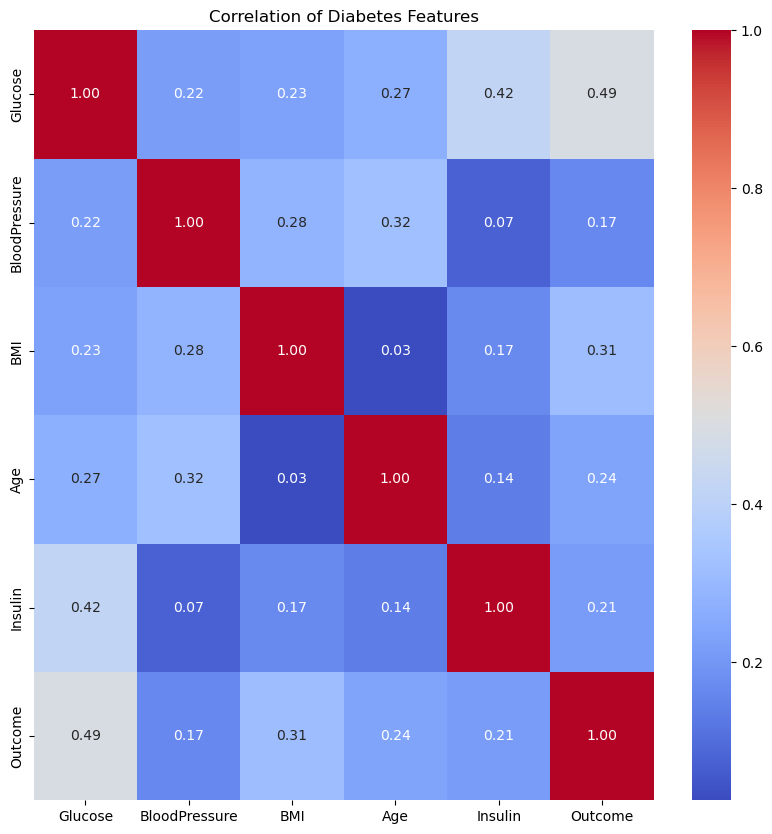

Glucose 0.4929277417956557


In [6]:
listofcolumns = ["Glucose", "BloodPressure", "BMI", "Age", "Insulin", "Outcome"]
subsetdf = diabetes[listofcolumns]

matrix = subsetdf.corr()
matrix


plt.figure(figsize=(10,10))
sns.heatmap(subsetdf.corr(), annot=True,fmt=".2f", cmap="coolwarm")
plt.title("Correlation of Diabetes Features")
plt.show()
drop_column = matrix.loc[: , "Outcome"].drop(index='Outcome', columns='Outcome')
idxmaxi = drop_column.idxmax()
maxi = drop_column.max()
print(idxmaxi , maxi)